# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Aisyah Amelia Zarah Juaita]
- **Email:** [aisyahamelia740@gmail.com]
- **ID Dicoding:** [aisyahameliazarahj]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 Bagaimana dampak hari libur terhadap jumlah peminjaman sepeda?
- Pertanyaan 2 Seberapa besar pengaruh kelembapan udara terhadap jumlah penyewaan sepeda?
- Pertanyaan 3 Bagaimana tren penggunaan sepeda sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [33]:
#Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


## Data Wrangling

### Gathering Data

- Menampilkan 5 baris pertama dari dataset day_df

In [34]:
day_df = pd.read_csv('/content/day (1).csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Menampilkan 5 baris pertama dari dataset hour_df

In [35]:
hour_df = pd.read_csv('/content/hour (1).csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
- day_df merupakan dataset yang berisi data peminjaman sepeda yang dikumpulkan secara harian, sehingga setiap baris mewakili satu hari.
- hour_day merupakan dataset yang memiliki struktur mirip dengan day_df tetapi dengan data peminjaman yang dikumpulkan per jam, sehingga setiap baris mewakili satu jam dalam satu hari tertentu.

### Assessing Data

- Memeriksa Tipe Data day_df

In [36]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Memeriksa Missing Value day_df

In [37]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- Memeriksa Duplikasi Data day_df

In [38]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- Memeriksa Statistik Parameter day_df

In [39]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Memeriksa Tipe Data hour_df

In [40]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Memeriksa Missing Value hour_df

In [41]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


- Memeriksa Duplikasi Data hour_df

In [42]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


- Memeriksa Statistik Parameter hour_df

In [43]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**

- day_df dan hour_df

Dari analisis awal terhadap kedua dataset ini, diketahui bahwa tidak ada data yang hilang atau duplikat, sehingga data dalam kondisi bersih dan siap untuk dianalisis lebih lanjut.
  - day_df

Pada day_df, setiap baris merepresentasikan jumlah peminjaman sepeda dalam satu hari. Data ini mencakup variabel seperti musim (season), cuaca (weathersit), suhu (temp), kelembaban (hum), serta kecepatan angin (windspeed). Dengan jumlah observasi yang lebih sedikit dibandingkan hour_df, dataset ini cocok untuk melihat tren penggunaan sepeda dalam jangka waktu yang lebih panjang, seperti pola musiman atau pengaruh hari kerja dan hari libur terhadap peminjaman sepeda.
  - hour_df
  
Sementara itu, hour_df memberikan informasi yang lebih rinci dengan mencatat jumlah peminjaman sepeda dalam setiap jam sepanjang hari. Dengan lebih dari 17.000 entri, dataset ini memungkinkan analisis yang lebih mendalam terkait pola penggunaan sepeda berdasarkan jam, misalnya lonjakan peminjaman saat jam sibuk pagi dan sore. Data ini juga menunjukkan bahwa tren peminjaman dapat dipengaruhi oleh faktor cuaca, hari kerja, dan tipe pengguna (kasual atau terdaftar).

### Cleaning Data

- Memeriksa dan Menangani Outlier Menggunakan IQR

In [44]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

num_columns_day = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
num_columns_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

day_df = remove_outliers_iqr(day_df, num_columns_day)
hour_df = remove_outliers_iqr(hour_df, num_columns_hour)

- Mengkonversi Tipe Data Kolom yang Harusnya Category

In [45]:
day_df['season'] = day_df['season'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

hour_df['season'] = hour_df['season'].astype('category')
hour_df['mnth'] = hour_df['mnth'].astype('category')
hour_df['holiday'] = hour_df['holiday'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

- Menampilkan Hasil Cleaning

In [46]:
day_info = day_df.info()
hour_info = hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     676 non-null    int64   
 1   dteday      676 non-null    object  
 2   season      676 non-null    category
 3   yr          676 non-null    int64   
 4   mnth        676 non-null    category
 5   holiday     676 non-null    category
 6   weekday     676 non-null    category
 7   workingday  676 non-null    category
 8   weathersit  676 non-null    category
 9   temp        676 non-null    float64 
 10  atemp       676 non-null    float64 
 11  hum         676 non-null    float64 
 12  windspeed   676 non-null    float64 
 13  casual      676 non-null    int64   
 14  registered  676 non-null    int64   
 15  cnt         676 non-null    int64   
dtypes: category(6), float64(4), int64(5), object(1)
memory usage: 63.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 14933 entries, 0 to 173

- Mengubah Tipe Data Object Menjadi Datetime

In [47]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     676 non-null    int64         
 1   dteday      676 non-null    datetime64[ns]
 2   season      676 non-null    category      
 3   yr          676 non-null    int64         
 4   mnth        676 non-null    category      
 5   holiday     676 non-null    category      
 6   weekday     676 non-null    category      
 7   workingday  676 non-null    category      
 8   weathersit  676 non-null    category      
 9   temp        676 non-null    float64       
 10  atemp       676 non-null    float64       
 11  hum         676 non-null    float64       
 12  windspeed   676 non-null    float64       
 13  casual      676 non-null    int64         
 14  registered  676 non-null    int64         
 15  cnt         676 non-null    int64         
dtypes: category(6), datetime64[ns](

**Insight**

Kode di atas ini bertujuan untuk membersihkan sebuah dataset day_df dan hour_df dengan beberapa tahapan:

- Melakukan penghapusan outlier menggunakan metode Interquartile Range (IQR) pada beberapa kolom numerik seperti suhu (temp), kelembaban (hum), kecepatan angin (windspeed), serta jumlah penyewa sepeda (casual, registered, cnt). Outlier dihapus dengan menentukan batas bawah dan atas berdasarkan Q1 dan Q3, tetapi terdapat kesalahan sintaksis (lower_bo und yang seharusnya lower_bound), yang perlu diperbaiki agar fungsi dapat berjalan dengan baik.

- Beberapa kolom kategori seperti season, mnth, holiday, weekday, workingday, dan weathersit dikonversi ke tipe data category untuk menghemat memori dan meningkatkan efisiensi analisis. Setelah proses ini, informasi dataset ditampilkan untuk melihat perubahan yang terjadi, terutama dalam jumlah baris akibat penghapusan outlier.

- Terakhir, kolom tanggal (dteday) dikonversi ke format datetime agar dapat digunakan untuk analisis berbasis waktu, seperti tren penyewaan sepeda dalam periode tertentu. Secara keseluruhan, kode ini bertujuan untuk meningkatkan kualitas data sebelum dilakukan analisis lebih lanjut, namun masih memerlukan perbaikan minor agar dapat berfungsi dengan optimal.

## Exploratory Data Analysis (EDA)

- Explore Data day_df

In [48]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,676.000000,676,676.0,676.000000,676.0,676.0,676.0,676.0,676.0,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
unique,NaN,NaN,4.0,NaN,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,1.0,0.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,173.0,NaN,61.0,658.0,103.0,490.0,422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,358.355030,2011-12-24 08:31:14.556212992,NaN,0.476331,NaN,NaN,NaN,NaN,NaN,0.489558,0.469260,0.633115,0.186731,745.822485,3628.752959,4374.575444
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.750000,2011-06-24 18:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.329167,0.326382,0.525059,0.134177,304.750000,2481.750000,3070.250000
50%,349.500000,2011-12-15 12:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.481667,0.470633,0.631250,0.178481,685.000000,3615.500000,4417.000000
75%,545.250000,2012-06-28 06:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.653541,0.607959,0.734583,0.230798,1033.750000,4696.250000,5642.500000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.378108,2301.000000,6946.000000,8173.000000


- Total Jumlah Penyewaan Sepeda yang Terdaftar (registered) dan Tidak Terdaftar (casual) untuk Setiap Musim day_df

In [49]:
day_df.groupby(by="season").agg({
    "registered":["sum"],
    "casual":["sum"]
})

<ipython-input-49-58ac1ef1b759>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


,registered,casual
,sum,sum
season,,
1,384960,55044
2,624313,149700
3,769078,187039
4,674686,112393


- Mengelompokkan Data Berdasarkan (weekday), Menjumlahkan Total Penyewaan (cnt), Mengurutkan dari yang Tertinggi, dan Menampilkan empat Hari Teratas day_df

In [50]:
day_df.groupby(by="weekday", observed=True)["cnt"].sum().sort_values(ascending=False).reset_index().head(4)


,weekday,cnt
0,4,475195
1,5,474859
2,2,467314
3,3,462269


- Explore Data hour_df

In [51]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14933.000000,14933,14933.0,14933.000000,14933.0,14933.000000,14933.0,14933.0,14933.0,14933.0,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000,14933.000000
unique,NaN,730,4.0,NaN,12.0,NaN,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,1.0,NaN,12.0,NaN,0.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,3915.0,NaN,1402.0,NaN,14518.0,2230.0,10594.0,9563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8424.626733,NaN,NaN,0.474586,NaN,11.091140,NaN,NaN,NaN,NaN,0.478937,0.460341,0.646137,0.180080,23.173977,117.352240,140.526217
std,5032.689244,NaN,NaN,0.499370,NaN,7.176355,NaN,NaN,NaN,NaN,0.190407,0.170326,0.188255,0.112139,26.150841,103.941618,121.339831
min,1.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4083.000000,NaN,NaN,0.000000,NaN,5.000000,NaN,NaN,NaN,NaN,0.320000,0.318200,0.500000,0.104500,3.000000,26.000000,31.000000
50%,8258.000000,NaN,NaN,0.000000,NaN,11.000000,NaN,NaN,NaN,NaN,0.460000,0.454500,0.650000,0.164200,12.000000,96.000000,115.000000
75%,12725.000000,NaN,NaN,1.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.640000,0.606100,0.810000,0.253700,36.000000,178.000000,221.000000


- Total Penyewaan Sepeda per Musim (Registered vs Casual) hour_df

In [52]:
hour_df.groupby(by="season").agg({
    "registered":["sum"],
    "casual":["sum"]
})

<ipython-input-52-9e1f1045f9f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="season").agg({


,registered,casual
,sum,sum
season,,
1,336226,44735
2,434286,101243
3,494136,125189
4,487773,74890


- Mengkelompokkan top empat Hari dengan Penyewaan Sepeda Terbanyak hour_df

In [53]:
hour_df.groupby(by="weekday", observed=True)["cnt"].sum().sort_values(ascending=False).reset_index().head(4)


,weekday,cnt
0,5,359750
1,4,338337
2,3,321897
3,2,319448


**Insight:**

Pada kode di atas ini bertujuan untuk melakukan eksplorasi data dan analisis agregat pada dataset day_df dan hour_df:

- Fungsi describe(include="all") digunakan untuk mendapatkan ringkasan statistik dari seluruh kolom dalam kedua dataset, termasuk nilai rata-rata, standar deviasi, nilai minimum, maksimum, serta distribusi data untuk kolom kategorikal.

- Melakukan analisis jumlah pengguna sepeda berdasarkan musim (season) menggunakan metode groupby(), di mana jumlah total pengguna terdaftar (registered) dan pengguna tidak terdaftar (casual) dijumlahkan dalam setiap musim. Hasil ini dapat memberikan gambaran tren penggunaan sepeda dalam berbagai kondisi cuaca musiman.

- Terakhir adalah analisis lebih lanjut dilakukan dengan mengelompokkan data berdasarkan hari dalam seminggu (weekday) untuk melihat jumlah total penyewaan sepeda (cnt). Data ini disortir dalam urutan menurun, dan hanya 4 hari dengan jumlah penyewaan tertinggi yang ditampilkan menggunakan head(4). Hal ini bertujuan untuk mengidentifikasi hari-hari dengan permintaan tertinggi, yang dapat berguna dalam optimasi layanan penyewaan sepeda. Namun, terdapat kesalahan sintaksis pada bagian day_df.roupby(by="weekday", observed=True) yang seharusnya day_df.groupby(by="weekday", observed=True). Secara keseluruhan, kode ini membantu dalam memahami pola penggunaan sepeda berdasarkan musim dan hari dalam seminggu, yang dapat digunakan untuk pengambilan keputusan terkait perencanaan dan pengelolaan sistem penyewaan sepeda.









## Visualization & Explanatory Analysis

Pertanyaan 1: Bagaimana dampak hari libur terhadap jumlah peminjaman sepeda?

<ipython-input-54-557f091bf736>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals = day_df.groupby('holiday_label')['cnt'].mean()


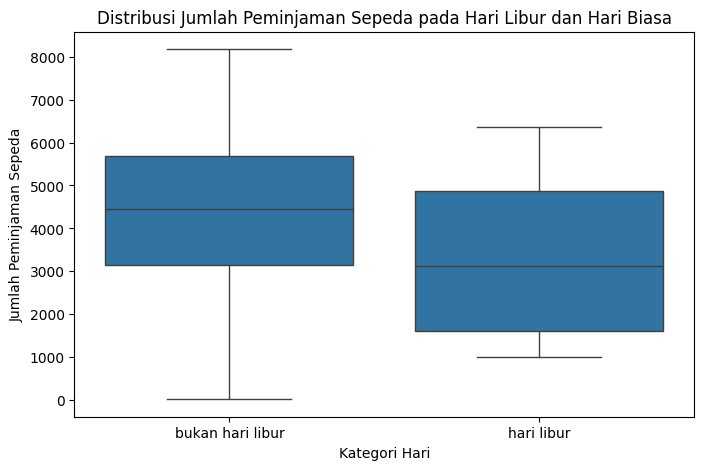

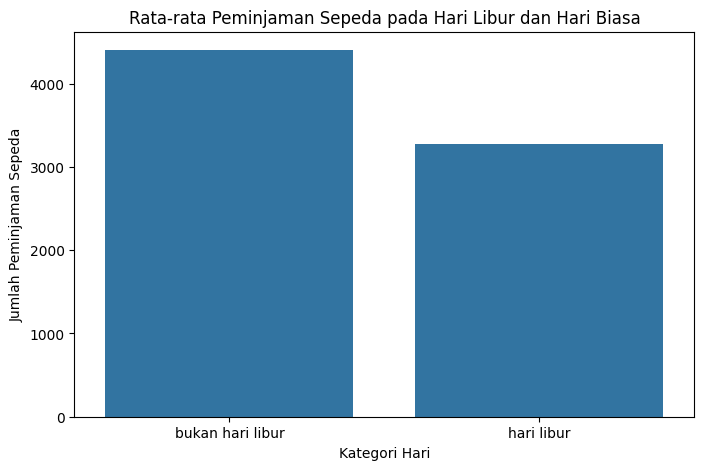

In [54]:
# Mapping kolom 'holiday' (0 = bukan hari libur, 1 = hari libur)
day_df['holiday_label'] = day_df['holiday'].map({0: 'bukan hari libur', 1: 'hari libur'})

# Membandingkan jumlah penyewaan sepeda rata-rata
avg_rentals = day_df.groupby('holiday_label')['cnt'].mean()

# Visualisasi dengan boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='holiday_label', y='cnt', data=day_df)
plt.title("Distribusi Jumlah Peminjaman Sepeda pada Hari Libur dan Hari Biasa")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rentals.index, y=avg_rentals.values)  # Ganti boxplot ke barplot
plt.title("Rata-rata Peminjaman Sepeda pada Hari Libur dan Hari Biasa")
plt.xlabel("Kategori Hari")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

**Insight**

- Pada kode dan output di atas, bertujuan untuk menganalisis perbedaan jumlah penyewaan sepeda pada hari libur dan hari biasa. Pertama, dilakukan pemetaan ulang pada kolom holiday, di mana nilai 0 diubah menjadi "bukan hari libur" dan nilai 1 menjadi "hari libur". Hal ini bertujuan untuk memudahkan interpretasi data. Setelah itu, dilakukan perhitungan rata-rata jumlah peminjaman sepeda (cnt) berdasarkan kategori hari menggunakan fungsi groupby(), yang memberikan gambaran apakah terdapat perbedaan signifikan dalam pola penggunaan sepeda antara hari libur dan hari biasa.

- Selanjutnya, dua visualisasi dibuat untuk memperjelas analisis. Boxplot digunakan untuk menunjukkan distribusi jumlah peminjaman sepeda pada hari libur dan hari biasa. Dari boxplot ini, kita dapat mengamati sebaran data, nilai median, serta apakah terdapat pencilan (outliers) dalam jumlah peminjaman sepeda. Sementara itu, bar chart digunakan untuk menampilkan perbandingan rata-rata jumlah peminjaman sepeda antara hari libur dan hari biasa, memberikan gambaran yang lebih langsung mengenai tren peminjaman.

- Dari analisis ini, jika ditemukan bahwa rata-rata peminjaman sepeda lebih tinggi pada hari biasa dibandingkan hari libur, maka ini bisa menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan sehari-hari seperti bekerja atau sekolah. Sebaliknya, jika peminjaman lebih tinggi pada hari libur, maka ini bisa mengindikasikan bahwa penggunaan sepeda lebih dominan untuk rekreasi. Analisis ini dapat membantu pengelola layanan sepeda dalam menyesuaikan strategi operasional, seperti menambah jumlah sepeda pada hari dengan permintaan tinggi.

Pertanyaan 2: Seberapa besar pengaruh kelembapan udara terhadap jumlah penyewaan sepeda?

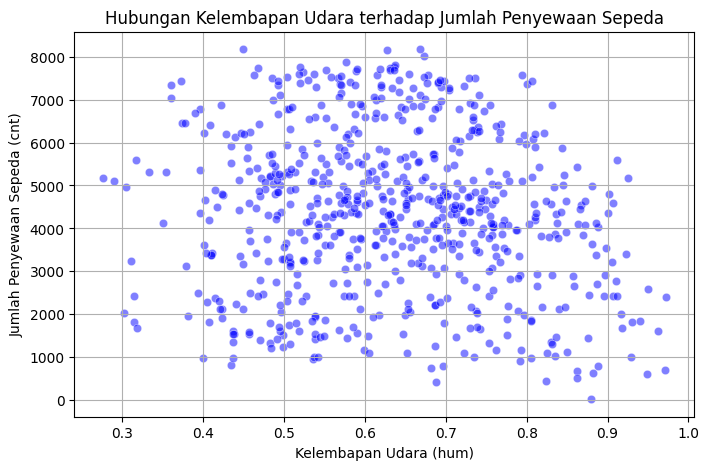

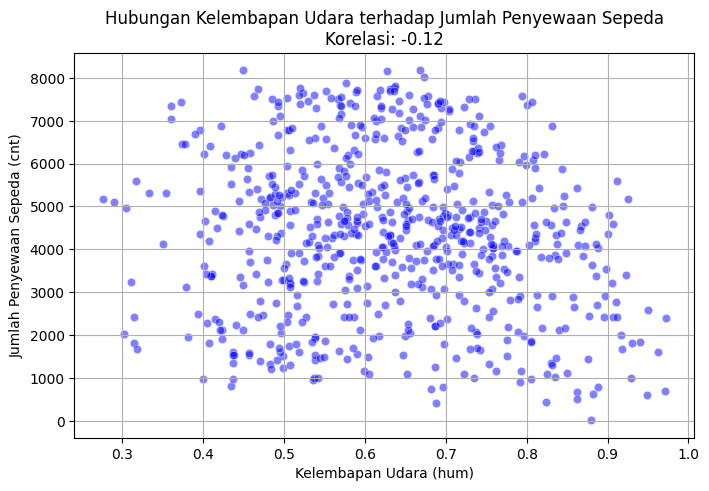

In [55]:
# Visualisasi scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=day_df['hum'], y=day_df['cnt'], alpha=0.5, color='blue')
plt.title("Hubungan Kelembapan Udara terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Kelembapan Udara (hum)")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt)")
plt.grid(True)
plt.show()

# Menghitung korelasi antara kelembapan dan jumlah penyewaan
correlation = day_df[['hum', 'cnt']].corr().iloc[0, 1]

# Visualisasi hubungan korelasi dengan anotasi pada scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=day_df['hum'], y=day_df['cnt'], alpha=0.5, color='blue')
plt.title(f"Hubungan Kelembapan Udara terhadap Jumlah Penyewaan Sepeda\nKorelasi: {correlation:.2f}")
plt.xlabel("Kelembapan Udara (hum)")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt)")
plt.grid(True)

**Insight:**

Analisis ini menunjukkan hubungan antara kelembapan udara (hum) dan jumlah penyewaan sepeda (cnt) melalui scatter plot dan perhitungan korelasi. Jika korelasi bernilai negatif signifikan, berarti kelembapan tinggi cenderung menurunkan jumlah penyewaan, kemungkinan karena ketidaknyamanan atau cuaca buruk. Jika korelasi lemah, berarti kelembapan tidak berpengaruh besar. Hasil ini dapat membantu pengelola layanan sepeda dalam perencanaan operasional berdasarkan kondisi cuaca.

Pertanyaan 3: Bagaimana tren penggunaan sepeda sepanjang tahun?

In [56]:
# Konversi kolom tanggal menjadi format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Tambahkan kolom bulan untuk analisis tren bulanan
day_df['month'] = day_df['dteday'].dt.month

# Hitung rata-rata penyewaan sepeda per bulan
monthly_trend = day_df.groupby('month')['cnt'].mean().reset_index()

# Label bulan untuk sumbu X
bulan_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agt', 'Sep', 'Okt', 'Nov', 'Des']

# Buat chart menggunakan Altair
chart = alt.Chart(monthly_trend).mark_line(point=True, color="gold").encode(
    x=alt.X('month:O', title='Bulan', sort=list(range(1, 13)), axis=alt.Axis(labelAngle=0), scale=alt.Scale(zero=False)),
    y=alt.Y('cnt:Q', title='Rata-rata Jumlah Penyewaan Sepeda'),
    tooltip=['month', 'cnt']
).properties(width=800, height=400, title="Tren Penggunaan Sepeda Sepanjang Tahun")

# Tampilkan grafik di Google Colab
chart.show()

alt.Chart(...)

**Insight**

Analisis di atas merupakan tren penggunaan sepeda berdasarkan bulan dalam setahun. Dengan mengonversi kolom dteday ke format datetime dan menambahkan kolom month, dilakukan perhitungan rata-rata jumlah penyewaan sepeda setiap bulan menggunakan groupby(). Visualisasi menggunakan line plot menunjukkan bagaimana jumlah peminjaman sepeda berfluktuasi sepanjang tahun. Jika terdapat pola tertentu, seperti peningkatan pada bulan tertentu (misalnya musim panas) dan penurunan di bulan lain (misalnya musim hujan atau dingin), maka hal ini bisa menjadi dasar dalam pengambilan keputusan, seperti menyesuaikan jumlah sepeda yang tersedia sesuai dengan musim atau meningkatkan promosi pada bulan dengan peminjaman rendah.

# Analysis Lanjutan (Opsional)

### Distiribusi Clustering per Musim

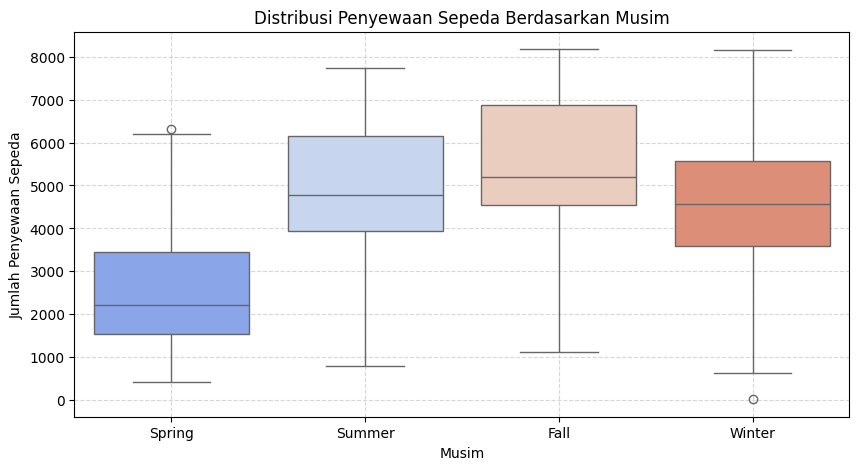

In [57]:
# Visualisasi distribusi penyewaan sepeda berdasarkan musim (boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=day_df, hue="season", palette="coolwarm")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend([], [], frameon=False)
plt.show()


**- Insight**

Analisis ini menunjukkan bahwa menganalisis distribusi jumlah penyewaan sepeda berdasarkan musim menggunakan boxplot. Boxplot membantu melihat sebaran data, nilai median, serta adanya pencilan (outliers) dalam setiap musim. Dari visualisasi ini, kita dapat mengetahui musim dengan jumlah penyewaan tertinggi dan terendah. Jika musim panas (Summer) dan gugur (Fall) memiliki jumlah penyewaan lebih tinggi dibandingkan musim dingin (Winter) atau semi (Spring), ini bisa menunjukkan bahwa cuaca yang lebih hangat lebih mendukung aktivitas bersepeda. Sebaliknya, jika penyewaan menurun drastis di musim tertentu, seperti musim dingin, maka faktor cuaca ekstrem bisa menjadi alasan. Hasil analisis ini dapat membantu pengelola layanan sepeda dalam merencanakan strategi operasional, seperti menyesuaikan jumlah sepeda yang tersedia di setiap musim atau memberikan promo saat musim dengan permintaan rendah.

## Conclusion

- Pertanyaan 1: Bagaimana dampak hari libur terhadap jumlah peminjaman sepeda?

Data menunjukkan bahwa jumlah peminjaman sepeda lebih tinggi dan bervariasi pada hari kerja, menunjukkan bahwa sepeda digunakan lebih sering untuk mobilitas seperti ke kantor atau ke sekolah. Sebaliknya, pada hari libur, jumlah peminjaman sepeda lebih rendah tetapi tetap signifikan, yang menunjukkan bahwa sepeda digunakan lebih sering untuk aktivitas rekreasi.

Untuk mengoptimalkan strategi bisnis mereka, layanan penyewaan sepeda dapat berkonsentrasi pada meningkatkan kemudahan bagi karyawan dan siswa di hari kerja. Di hari libur, sebaliknya, untuk menarik pelanggan rekreasi, dapat diterapkan promosi khusus, diskon, event bersepeda, atau paket wisata bersepeda.


- Pertanyaan 2: Seberapa besar pengaruh kelembapan udara terhadap jumlah penyewaan sepeda?

Kelembapan udara bukan faktor utama dalam menentukan jumlah peminjaman sepeda, Faktor lain, seperti suhu dan kondisi cuaca, mungkin lebih berpengaruh, jadi pertimbangan lebih lanjut diperlukan, Bisnis penyewaan sepeda tidak perlu terlalu khawatir tentang kelembapan udara, sebaliknya, mereka lebih baik berkonsentrasi pada faktor yang lebih dominan, seperti suhu dan tren musiman.


- Pertanyaan 3: Bagaimana tren penggunaan sepeda sepanjang tahun?

Musim atau cuaca kemungkinan menjadi faktor utama dalam tren peminjaman sepeda, Selama bulan-bulan sibuk (Mei hingga September), bisnis penyewaan sepeda dapat berkonsentrasi pada meningkatkan promosi dan layanan, dan Selama bulan-bulan sepi (Oktober hingga Februari), dapat dilakukan rencana diskon atau event khusus untuk meningkatkan minat penyewaan.

